# Neural Network Model

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
import csv
import collections
import time
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [19]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# convert 1 to 0 and 2 to 1
data['Winner'] = data['Winner'].replace(1, 0)
data['Winner'] = data['Winner'].replace(2, 1)

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.7)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)


In [20]:
# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
import tensorflow as tf

# Standardize the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model.
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.3)

# Evaluate the model.
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions.
predictions = model.predict(X_test)

print(f'Test accuracy: {accuracy}, Test loss: {loss}')

Epoch 1/500
6/6 [==============================] - 0s 29ms/step - loss: 0.7331 - accuracy: 0.5141 - val_loss: 0.7317 - val_accuracy: 0.5195
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5833 - accuracy: 0.6836 - val_loss: 0.7093 - val_accuracy: 0.5455
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4898 - accuracy: 0.8079 - val_loss: 0.6522 - val_accuracy: 0.6104
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4317 - accuracy: 0.8983 - val_loss: 0.6170 - val_accuracy: 0.6753
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3745 - accuracy: 0.9040 - val_loss: 0.6325 - val_accuracy: 0.6753
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3182 - accuracy: 0.9209 - val_loss: 0.6332 - val_accuracy: 0.6883
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2726 - accuracy: 0.9492 - val_loss: 0.6083 - val_accuracy: 0.7532
Epoch 8/500
6/6 [=========

In [32]:
import tensorflow as tf

# Standardize the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(250, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(125, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Compile the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model.
model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model.
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions.
predictions = model.predict(X_test)

print(f'Test accuracy: {accuracy}, Test loss: {loss}')

Epoch 1/500
13/13 [==============================] - 0s 11ms/step - loss: 0.7100 - accuracy: 0.5567 - val_loss: 0.7032 - val_accuracy: 0.4314
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.5567 - val_loss: 0.7052 - val_accuracy: 0.4510
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.6108 - val_loss: 0.6965 - val_accuracy: 0.4902
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6070 - accuracy: 0.6847 - val_loss: 0.6740 - val_accuracy: 0.6471
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7143 - val_loss: 0.6725 - val_accuracy: 0.6078
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7685 - val_loss: 0.6670 - val_accuracy: 0.6078
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5041 - accuracy: 0.7685 - val_loss: 0.6488 - val_accuracy: 0.5882
Epoch 8/500


In [9]:
model.save('MLP_model.h5')

In [10]:
import numpy as np 

# convert predictions to classes
predictions_conv = (predictions > 0.5).astype(int)

print(pd.Series.value_counts(predictions_conv.flatten() == y_test))

Winner
True     90
False    20
Name: count, dtype: int64


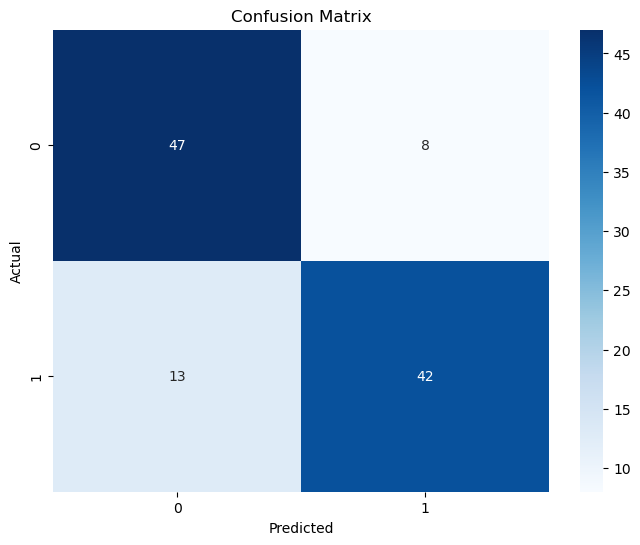

In [33]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions > 0.5)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')  
plt.show()


0.1
Epoch 1/500
9/9 [==============================] - 0s 15ms/step - loss: 0.7049 - accuracy: 0.5096 - val_loss: 0.6646 - val_accuracy: 0.5000
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6130 - val_loss: 0.6470 - val_accuracy: 0.6333
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6743 - val_loss: 0.6249 - val_accuracy: 0.6667
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.7165 - val_loss: 0.6248 - val_accuracy: 0.6333
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 0.5798 - accuracy: 0.7165 - val_loss: 0.6381 - val_accuracy: 0.6000
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.7433 - val_loss: 0.6422 - val_accuracy: 0.5667
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.7471 - val_loss: 0.6335 - val_accuracy: 0.6333
Epoch 8/500
9/9 [=====

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test accuracy: 0.9041095972061157, Test loss: 0.2443813681602478


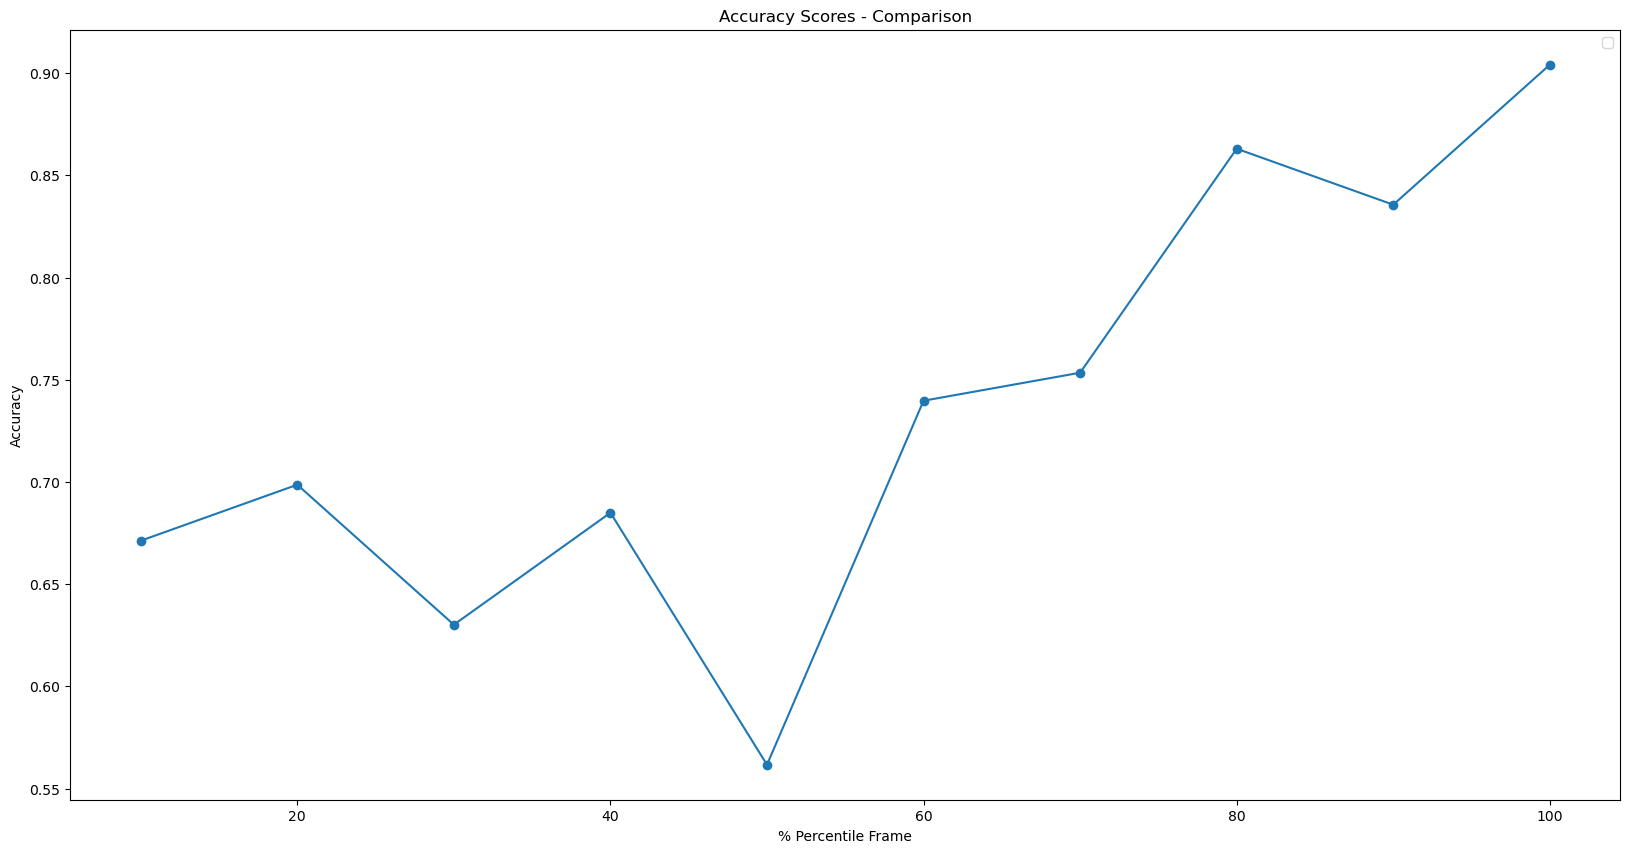

In [35]:
# Doing for all until 100%

# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# convert 1 to 0 and 2 to 1
data['Winner'] = data['Winner'].replace(1, 0)
data['Winner'] = data['Winner'].replace(2, 1)

def calculate_for_per2(per):
    # Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
    percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(per)

    # Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
    def find_nearest_row(group):
        nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
        return group.loc[[nearest_index]]

    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

    # Reset the index if needed
    nearest_rows.reset_index(drop=True, inplace=True)

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data.
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build the model.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250, activation='sigmoid', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


    # Compile the model.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model.
    model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

    # Evaluate the model.
    loss, accuracy = model.evaluate(X_test, y_test)

    # Make predictions.
    predictions = model.predict(X_test)

    print(f'Test accuracy: {accuracy}, Test loss: {loss}')

    # Return cross-validation scores
    return accuracy


plt.figure(figsize=(20, 10))
temp = []
for i in range(10, 110, 10):
    print(i / 100)
    temp.append(calculate_for_per2(i / 100))

plt.plot(range(10, 110, 10),temp, marker='o', linestyle='-')
    
plt.xlabel('% Percentile Frame')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()


0.1
Epoch 1/500
9/9 [==============================] - 0s 16ms/step - loss: 0.7205 - accuracy: 0.4789 - val_loss: 0.6740 - val_accuracy: 0.5667
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6360 - val_loss: 0.6600 - val_accuracy: 0.6000
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.6360 - val_loss: 0.6481 - val_accuracy: 0.7000
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.6973 - val_loss: 0.6259 - val_accuracy: 0.6667
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7088 - val_loss: 0.6338 - val_accuracy: 0.6000
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7395 - val_loss: 0.6327 - val_accuracy: 0.6333
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.7510 - val_loss: 0.6305 - val_accuracy: 0.6333
Epoch 8/500
9/9 [=====

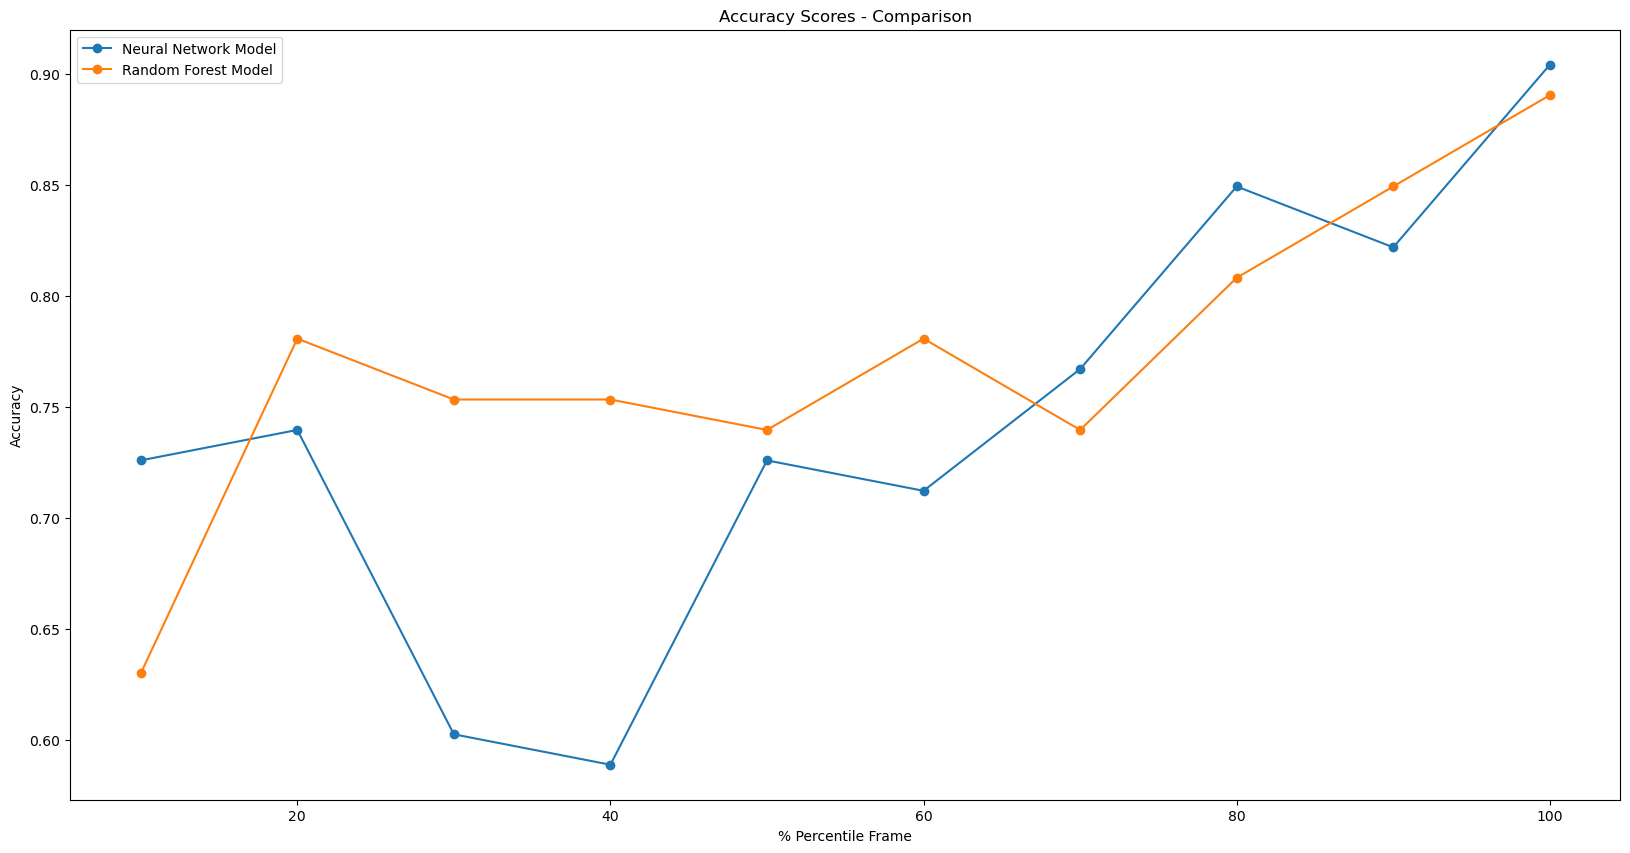

In [36]:
# Doing for all until 100%

# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)

label_encoder = LabelEncoder()
label_encoders = {}

for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName']:
    label_encoders[column] = LabelEncoder()
    nearest_rows[column] = label_encoders[column].fit_transform(nearest_rows[column])

# convert 1 to 0 and 2 to 1
data['Winner'] = data['Winner'].replace(1, 0)
data['Winner'] = data['Winner'].replace(2, 1)

def calculate_for_per2(per):
    # Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
    percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(per)

    # Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
    def find_nearest_row(group):
        nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
        return group.loc[[nearest_index]]

    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

    # Reset the index if needed
    nearest_rows.reset_index(drop=True, inplace=True)

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data.
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build the model.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250, activation='sigmoid', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


    # Compile the model.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model.
    model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

    # Evaluate the model.
    loss, accuracy = model.evaluate(X_test, y_test)

    # Make predictions.
    predictions = model.predict(X_test)

    print(f'Test accuracy: {accuracy}, Test loss: {loss}')

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracyRF = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    # Return cross-validation scores
    return accuracy, accuracyRF


plt.figure(figsize=(20, 10))
temp = []
temp2 = []
for i in range(10, 110, 10):
    print(i / 100)
    nn, rf = calculate_for_per2(i / 100)
    temp.append(nn)
    temp2.append(rf)

plt.plot(range(10, 110, 10),temp, marker='o', linestyle='-', label = "Neural Network Model")
plt.plot(range(10, 110, 10),temp2, marker='o', linestyle='-', label = "Random Forest Model")
    
plt.xlabel('% Percentile Frame')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()


# All Replays Combined Single File

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
import csv
import collections
import time

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [38]:
# Load the data
data = pd.read_csv('../StarCraft_Combined_Dataset.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
# convert 1 to 0 and 2 to 1
data['Winner'] = data['Winner'].replace(1, 0)
data['Winner'] = data['Winner'].replace(2, 1)

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.6)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)
# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)
print(nearest_rows)

label_encoders = {}

for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName']:
    label_encoders[column] = LabelEncoder()
    nearest_rows[column] = label_encoders[column].fit_transform(nearest_rows[column])



     ReplayID  Duration  Frame                      MapName  MapWidth  \
0        GG10     20568  12300                  Blade Storm       128   
1     GG10004     58147  34900             Tau Cross 1.1       128   
2      GG1002     18474  11000     WGTour (7) Gaema Gowon B       128   
3      GG1003     11479   6800       WGTour (7) Nostalgia B       128   
4      GG1004     24861  14900   WGTour (7) Neo Guillotine        128   
...       ...       ...    ...                          ...       ...   
2231    TL901     39030  23400                       Luna       128   
2232    TL937     34624  20700                신 백두대간 2.4        96   
2233    TL959     49197  29500              Rush Hour Ⅲ       128   
2234    TL983     18951  11300  PGT - Luna The Final [05]\n       128   
2235    TL996     50903  30500        Monty Hall_SE 2.1       128   

      MapHeight  Player1_EAPM  Player1_ECmdCount Player1_Race  Player2_EAPM  \
0           128           140               

In [3]:
# For inverse transforming, use the respective encoder
original_values = {}
for column in label_encoders:
    nearest_rows[column] = label_encoders[column].inverse_transform(nearest_rows[column])

In [49]:
X

,ReplayID,Duration,Frame,MapName,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,...,Player2_Ventral Sacs_Level,Player2_Zerg Carapace_Level,Player2_Zerg Flyer Attacks_Level,Player2_Zerg Flyer Carapace_Level,Player2_Zerg Melee Attacks_Level,Player2_Zerg Missile Attacks_Level,Player1_Alive_Special Map Revealer,Player1_Alive_Zerg Broodling,Player2_Alive_Special Map Revealer,Player2_Alive_Zerg Broodling
0,0,20568,12300,238,128,128,140,2001,0,105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,58147,34900,30,128,128,175,7104,1,153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,18474,11000,477,128,128,139,1794,1,145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,11479,6800,483,128,128,137,1094,1,138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,24861,14900,481,128,128,137,2376,2,167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2231,39030,23400,15,128,128,17,447,1,198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2232,2232,34624,20700,123,96,128,216,5225,0,223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2233,2233,49197,29500,199,128,128,151,5181,0,120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2234,2234,18951,11300,284,128,128,275,3633,2,116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Define features (X) and target variable (y)
X = nearest_rows.drop('Winner', axis=1)
y = nearest_rows['Winner']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [51]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69


In [56]:
import tensorflow as tf

# Standardize the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(250, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(125, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Compile the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model.
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate the model.
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions.
predictions = model.predict(X_test)

print(f'Test accuracy: {accuracy}, Test loss: {loss}')

Epoch 1/500
40/40 [==============================] - 0s 5ms/step - loss: 0.7322 - accuracy: 0.5232 - val_loss: 0.6797 - val_accuracy: 0.5431
Epoch 2/500
40/40 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5495 - val_loss: 0.6520 - val_accuracy: 0.6454
Epoch 3/500
40/40 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.5919 - val_loss: 0.6513 - val_accuracy: 0.5911
Epoch 4/500
40/40 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.6454 - val_loss: 0.6129 - val_accuracy: 0.6837
Epoch 5/500
40/40 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.6869 - val_loss: 0.6176 - val_accuracy: 0.6677
Epoch 6/500
40/40 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.6813 - val_loss: 0.6380 - val_accuracy: 0.6358
Epoch 7/500
40/40 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7117 - val_loss: 0.6003 - val_accuracy: 0.6901
Epoch 8/500
4

In [57]:
model.save("Combined_Replays_MLP_Model.h5")

# Comparison with Random Forest

### Complex MLP

0.1
Epoch 1/500
51/51 [==============================] - 0s 4ms/step - loss: 0.7101 - accuracy: 0.5103 - val_loss: 0.6898 - val_accuracy: 0.4916
Epoch 2/500
51/51 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5649 - val_loss: 0.6632 - val_accuracy: 0.6480
Epoch 3/500
51/51 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6022 - val_loss: 0.6753 - val_accuracy: 0.5642
Epoch 4/500
51/51 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6165 - val_loss: 0.6531 - val_accuracy: 0.6089
Epoch 5/500
51/51 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6302 - val_loss: 0.6873 - val_accuracy: 0.5754
Epoch 6/500
51/51 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6576 - val_loss: 0.6568 - val_accuracy: 0.6145
Epoch 7/500
51/51 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.6619 - val_loss: 0.6581 - val_accuracy: 0.6257
Epoch 8/5

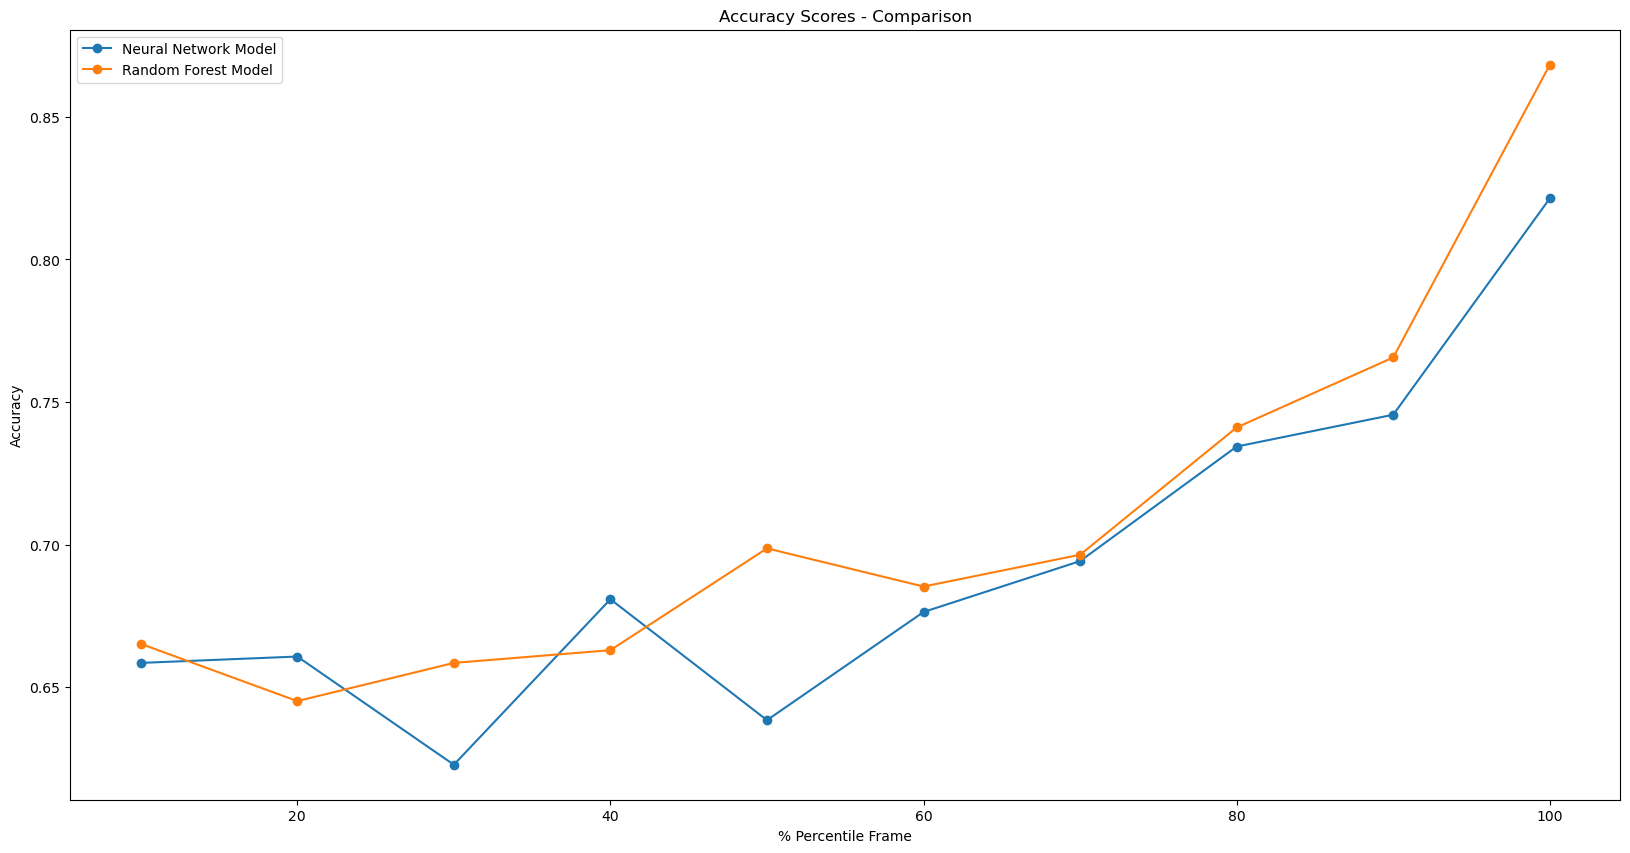

In [59]:
# Doing for all until 100%

# Load the data
data = pd.read_csv('../StarCraft_Combined_Dataset.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
label_encoders = {}

for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName']:
    label_encoders[column] = LabelEncoder()
    nearest_rows[column] = label_encoders[column].fit_transform(nearest_rows[column])

# convert 1 to 0 and 2 to 1
data['Winner'] = data['Winner'].replace(1, 0)
data['Winner'] = data['Winner'].replace(2, 1)

def calculate_for_per2(per):
    # Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
    percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(per)

    # Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
    def find_nearest_row(group):
        nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
        return group.loc[[nearest_index]]

    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

    # Reset the index if needed
    nearest_rows.reset_index(drop=True, inplace=True)

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data.
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build the model.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250, activation='sigmoid', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(125, activation='sigmoid'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


    # Compile the model.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model.
    model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

    # Evaluate the model.
    loss, accuracy = model.evaluate(X_test, y_test)

    # Make predictions.
    predictions = model.predict(X_test)

    print(f'Test accuracy: {accuracy}, Test loss: {loss}')

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracyRF = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    # Return cross-validation scores
    return accuracy, accuracyRF


plt.figure(figsize=(20, 10))
temp = []
temp2 = []
for i in range(10, 110, 10):
    print(i / 100)
    nn, rf = calculate_for_per2(i / 100)
    temp.append(nn)
    temp2.append(rf)

plt.plot(range(10, 110, 10),temp, marker='o', linestyle='-', label = "Neural Network Model")
plt.plot(range(10, 110, 10),temp2, marker='o', linestyle='-', label = "Random Forest Model")
    
plt.xlabel('% Percentile Frame')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()


### Simple MLP

0.1
Epoch 1/500
51/51 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5712 - val_loss: 0.6549 - val_accuracy: 0.6201
Epoch 2/500
51/51 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.6762 - val_loss: 0.6548 - val_accuracy: 0.5922
Epoch 3/500
51/51 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.6619 - val_loss: 0.6577 - val_accuracy: 0.5978
Epoch 4/500
51/51 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.6712 - val_loss: 0.6527 - val_accuracy: 0.6313
Epoch 5/500
51/51 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6818 - val_loss: 0.6681 - val_accuracy: 0.6034
Epoch 6/500
51/51 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.6737 - val_loss: 0.6682 - val_accuracy: 0.6034
Epoch 7/500
51/51 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.6762 - val_loss: 0.6570 - val_accuracy: 0.6145
Epoch 8/5

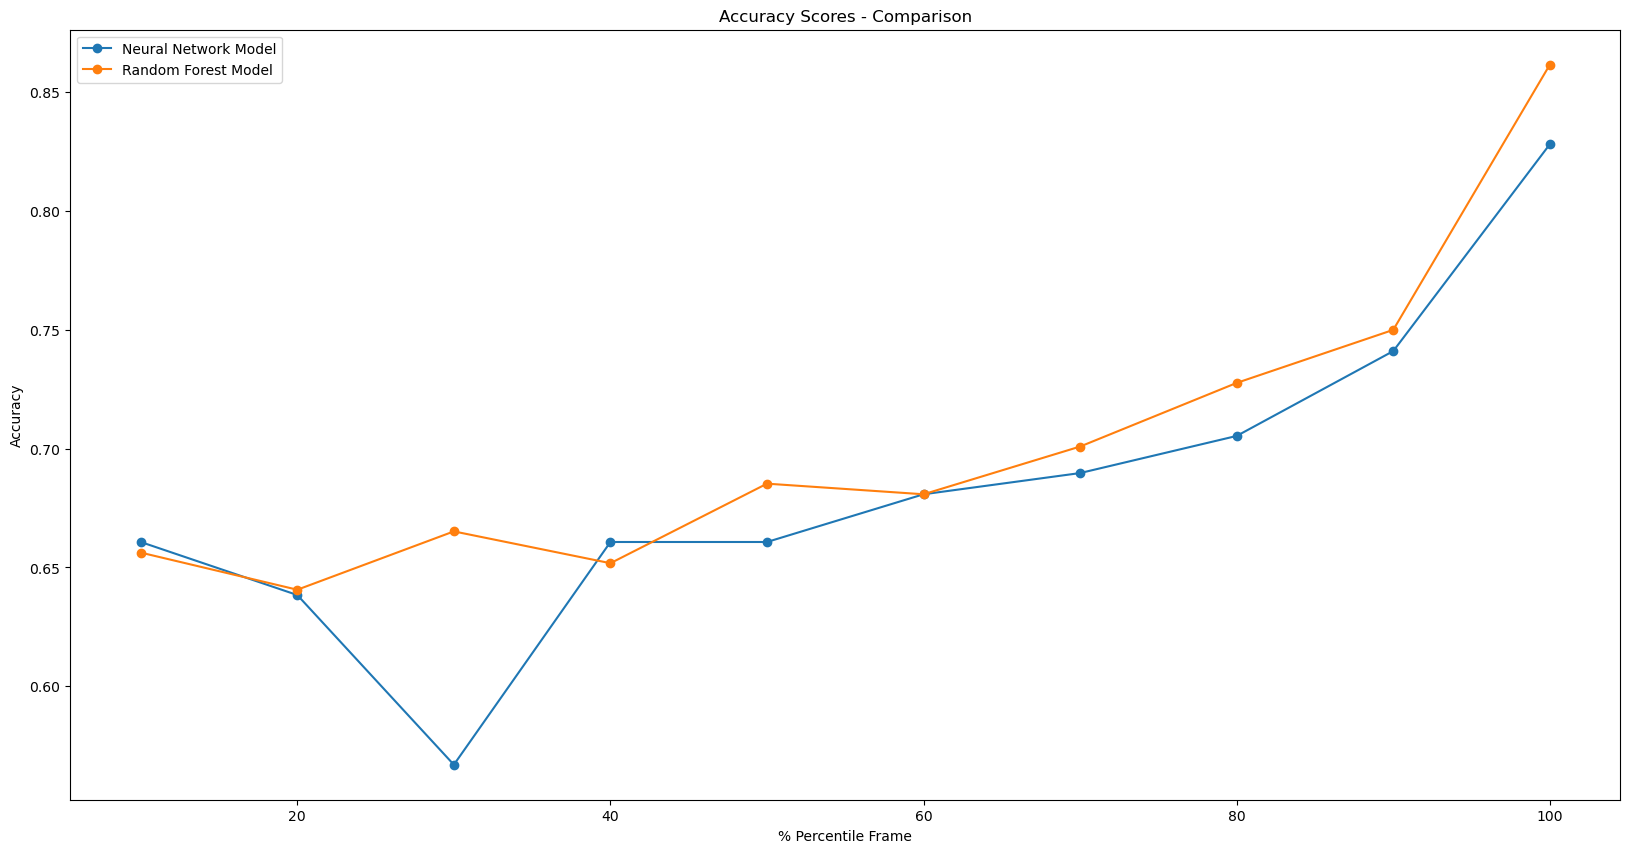

In [61]:
# Doing for all until 100%

# Load the data
data = pd.read_csv('../StarCraft_Combined_Dataset.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# convert 1 to 0 and 2 to 1
data['Winner'] = data['Winner'].replace(1, 0)
data['Winner'] = data['Winner'].replace(2, 1)

def calculate_for_per2(per):
    # Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
    percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(per)

    # Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
    def find_nearest_row(group):
        nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
        return group.loc[[nearest_index]]

    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

    # Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
    label_encoder = LabelEncoder()
    label_encoders = {}

    for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName']:
        label_encoders[column] = LabelEncoder()
        nearest_rows[column] = label_encoders[column].fit_transform(nearest_rows[column])


    # Reset the index if needed
    nearest_rows.reset_index(drop=True, inplace=True)

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['Winner'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data.
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build the model.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250, activation='sigmoid', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


    # Compile the model.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model.
    model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

    # Evaluate the model.
    loss, accuracy = model.evaluate(X_test, y_test)

    # Make predictions.
    predictions = model.predict(X_test)

    print(f'Test accuracy: {accuracy}, Test loss: {loss}')

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracyRF = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    # Return cross-validation scores
    return accuracy, accuracyRF


plt.figure(figsize=(20, 10))
temp = []
temp2 = []
for i in range(10, 110, 10):
    print(i / 100)
    nn, rf = calculate_for_per2(i / 100)
    temp.append(nn)
    temp2.append(rf)

plt.plot(range(10, 110, 10),temp, marker='o', linestyle='-', label = "Neural Network Model")
plt.plot(range(10, 110, 10),temp2, marker='o', linestyle='-', label = "Random Forest Model")
    
plt.xlabel('% Percentile Frame')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()


### MLP on Full Dataset

In [2]:
data = pd.read_csv('../Processed Datasets/StarCraft_Combined_Dataset.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
label_encoders = {}

for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName','Winner']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.8)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)


In [7]:
# Define features (X) and target variable (y)
X = nearest_rows.drop(['Winner'], axis=1)
y = nearest_rows['Winner']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [9]:
import tensorflow as tf

# Standardize the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(250, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(125, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Compile the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model.
model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model.
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions.
predictions = model.predict(X_test)

print(f'Test accuracy: {accuracy}, Test loss: {loss}')

Epoch 1/500
100/100 [==============================] - 1s 3ms/step - loss: 0.6984 - accuracy: 0.5642 - val_loss: 0.6498 - val_accuracy: 0.5919
Epoch 2/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.6965 - val_loss: 0.6158 - val_accuracy: 0.6751
Epoch 3/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7406 - val_loss: 0.5870 - val_accuracy: 0.7103
Epoch 4/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7676 - val_loss: 0.5807 - val_accuracy: 0.7179
Epoch 5/500
100/100 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7815 - val_loss: 0.5677 - val_accuracy: 0.7179
Epoch 6/500
100/100 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.7953 - val_loss: 0.5717 - val_accuracy: 0.7355
Epoch 7/500
100/100 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.7960 - val_loss: 0.5583 - val_accuracy: 0.7355

### At every 10% frame and comparison with random forest

0.1
Epoch 1/500
64/64 [==============================] - 1s 4ms/step - loss: 0.7135 - accuracy: 0.5171 - val_loss: 0.7083 - val_accuracy: 0.4934
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5818 - val_loss: 0.6989 - val_accuracy: 0.5463
Epoch 3/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6131 - val_loss: 0.6642 - val_accuracy: 0.6167
Epoch 4/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6234 - accuracy: 0.6548 - val_loss: 0.6744 - val_accuracy: 0.6256
Epoch 5/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.6626 - val_loss: 0.6847 - val_accuracy: 0.5859
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.6621 - val_loss: 0.6796 - val_accuracy: 0.6300
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6572 - val_loss: 0.6779 - val_accuracy: 0.6300
Epoch 8/5

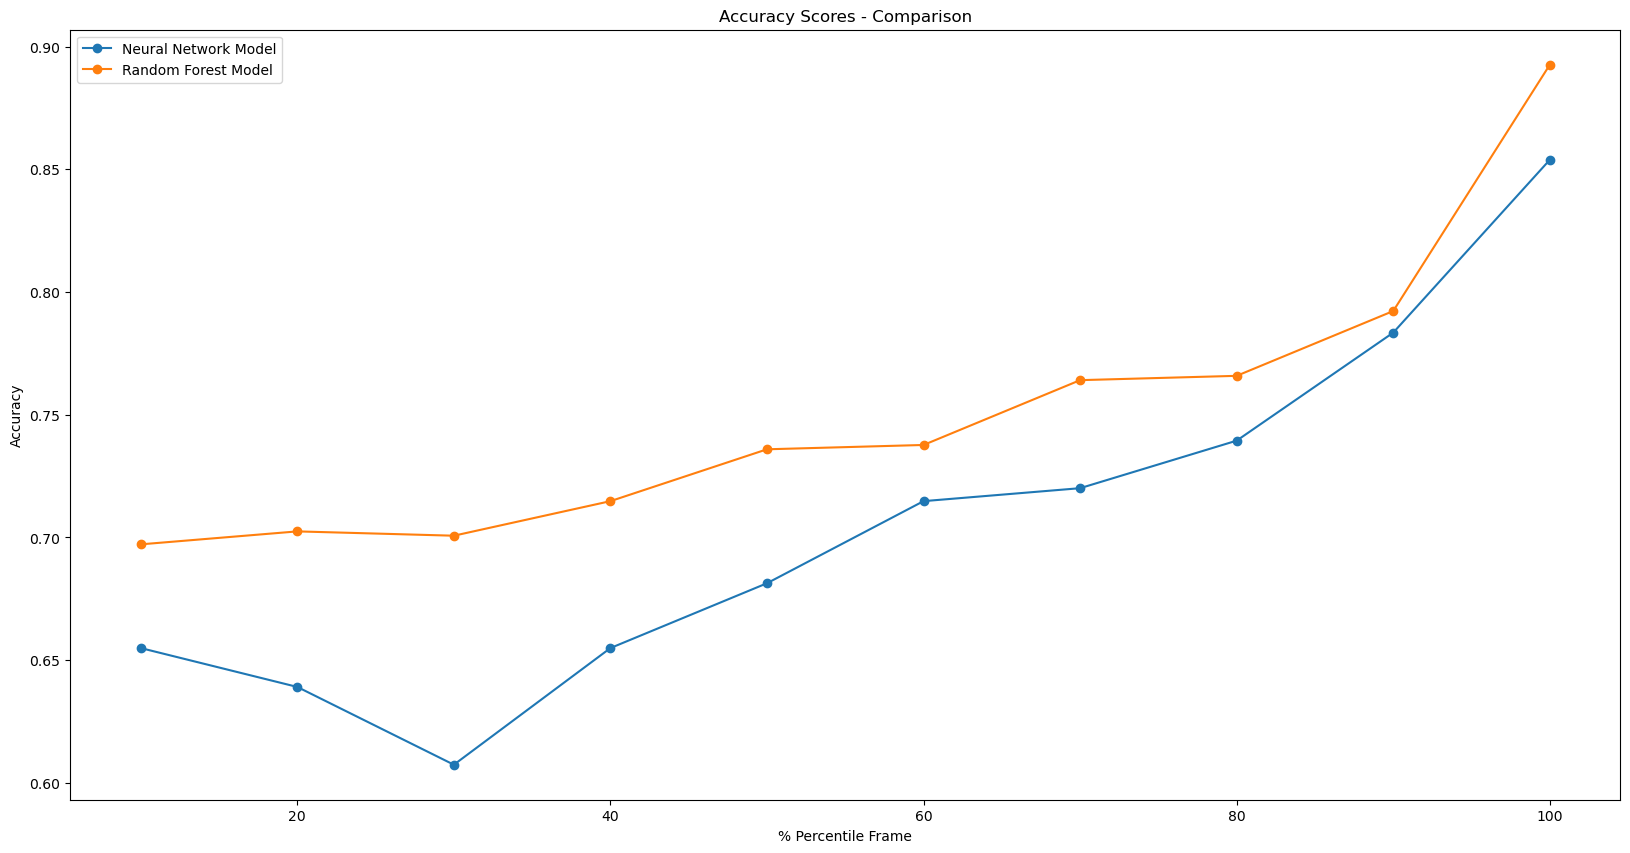

In [16]:
# Doing for all until 100%

data = pd.read_csv('../Processed Datasets/StarCraft_Combined_Dataset.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
label_encoders = {}

for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName','Winner']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

def calculate_for_per2(per):
    # Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
    percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(per)

    # Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
    def find_nearest_row(group):
        nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
        return group.loc[[nearest_index]]

    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

    # Reset the index if needed
    nearest_rows.reset_index(drop=True, inplace=True)

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['Winner'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data.
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build the model.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250, activation='sigmoid', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(125, activation='sigmoid'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


    # Compile the model.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model.
    model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

    # Evaluate the model.
    loss, accuracy = model.evaluate(X_test, y_test)

    print(f'Test accuracy: {accuracy}, Test loss: {loss}')

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracyRF = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    # Return cross-validation scores
    return accuracy, accuracyRF


plt.figure(figsize=(20, 10))
temp = []
temp2 = []
for i in range(10, 110, 10):
    print(i / 100)
    nn, rf = calculate_for_per2(i / 100)
    temp.append(nn)
    temp2.append(rf)

plt.plot(range(10, 110, 10),temp, marker='o', linestyle='-', label = "Neural Network Model")
plt.plot(range(10, 110, 10),temp2, marker='o', linestyle='-', label = "Random Forest Model")
    
plt.xlabel('% Percentile Frame')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()
